## QQ plot

- to compare if two R.V. follow the same distribution 
- if the qq plot of R.V of X vs. Y yields a st. line, X & Y follow the same distribution 

In [19]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt 

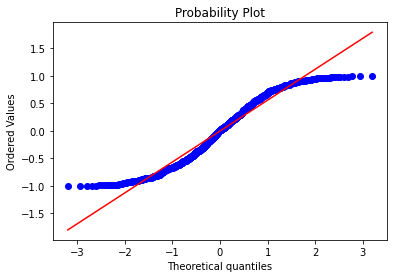

In [20]:
samples_norm = np.random.normal(loc=0,scale=1,size=1000) 
stats.probplot(samples, dist='norm', plot=plt) #plot quantiles of samples against that of normals & fit a best line
plt.show()

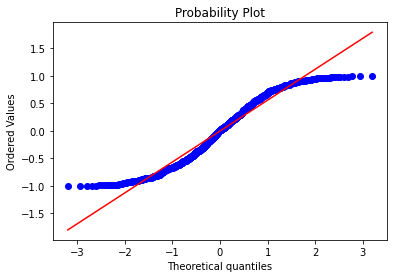

In [46]:
samples_uniform = np.random.uniform(low=-1, high =1,size=1000) 
stats.probplot(samples, dist='norm', plot=plt) #plot quantiles of samples against that of normally distributed data 
                                               #& fit a best line
plt.show()

### KSTest
- To check if two samples belong to the same distribution
- max. vertical distance of cdf of the two samples is deciding factor 

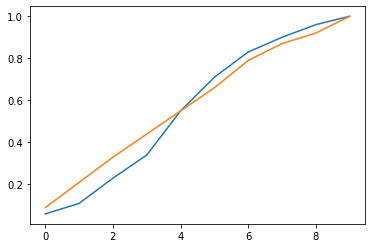

In [56]:
samples_norm1 = np.random.normal(loc=0,scale=1,size=100)
samples_norm2 = np.random.uniform(0,1,size=100)

counts, bin_edges = np.histogram(samples_norm1, bins=10, 
                                 density = True)
pdf =counts/sum(counts)
plt.plot(np.cumsum(pdf))

counts, bin_edges = np.histogram(samples_norm2, bins=10, 
                                 density = True)
pdf =counts/sum(counts)
plt.plot(np.cumsum(pdf))
plt.show()

In [57]:
stats.ks_2samp(samples_norm1, samples_norm2)

KstestResult(statistic=0.51, pvalue=3.319419024623016e-12)

We reject the null hypothesis : "The distribution of the two samples is same" because pvalue is less than 1% at significance level 5%.Thus, the two distributions belong to different distributions.

In [58]:
stats.kstest(samples_norm1, 'norm')

KstestResult(statistic=0.04724709522430873, pvalue=0.9712086298198827)

The pvalue =0.97 is high so we can't reject the null hypothesis. Thus, samples_norm1 & 'norm' follow same distribution.

## Box-cox transform 

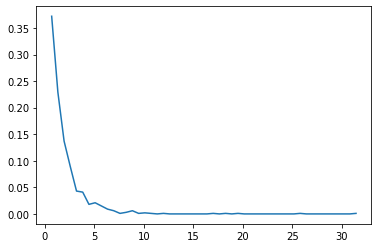

In [22]:
samples_lognorm =np.random.lognormal(mean=0.0, sigma=1.0, size=1000)
counts, bin_edges = np.histogram(samples_lognorm, bins=50, 
                                 density = True)
pdf =counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
plt.show()

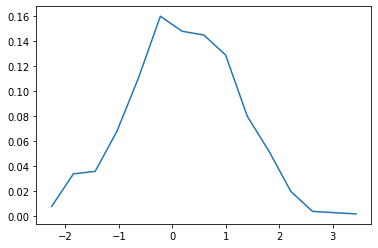

In [38]:
transformed=stats.boxcox(samples_lognorm)
counts, bin_edges = np.histogram(transformed[0], bins=15, 
                                 density = True)
pdf =counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
plt.show()

 The pdf of transformed data looks like gaussian

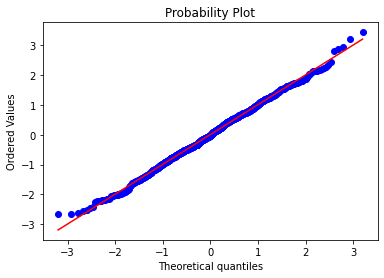

In [41]:
#we perform qq plot to be sure
stats.probplot(transformed[0], dist='norm', plot=plt)
plt.show()

## Confidence interval using bootstrapping
- to estimate C.I. for median, std. deviation and quantiles through simulation since Central Limit Theorem works for C.I. of mean only. 

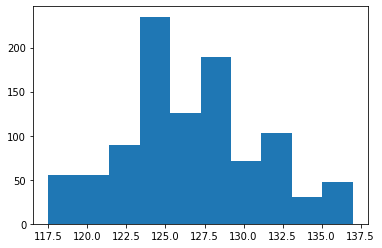

95.0 confidence interval 118.0 and 135.5


In [65]:
from sklearn.utils import resample
x = np.array([120,135,128,110,137,140,125,118,115,136,118,124,130,139])

n_iterations = 1000
n_size = int(len(x))

# bootstrapping
medians = list()
for i in range(n_iterations):
    s = resample(x, n_samples=n_size);
    m = np.median(s);
    medians.append(m)

# plot scor
plt.hist(medians)
plt.show()

confidence_interval = 0.95

# lower interval margin
p = ((1.0-confidence_interval)/2.0) * 100
lower =  np.percentile(medians, p) #25th value of 1000 sorted values 

#upper interval margin 
p = (confidence_interval+((1.0-confidence_interval)/2.0)) * 100
upper =  np.percentile(medians, p)

print('%.1f confidence interval %.1f and %.1f' % (confidence_interval*100, lower, upper))
